## **Data Preparation**

In [ ]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from scipy.stats.stats import pearsonr

In [ ]:
df = pd.read_csv('AirQualityUCI.csv', sep=';',decimal=",") 

In [ ]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [ ]:
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object

In [ ]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


##### Drop Columns Unnamed

First of all we saw that there are 2 columns that contain only NaN values, so we dropped out that columns.

The columns are labeled as Unnamed: 15 and Unnamed: 16

In [ ]:
df = df.drop(["Unnamed: 15","Unnamed: 16"], axis=1)

In [ ]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


##### Drop column NMHC(GT)

In this column there are too much -200 values (missing values) so also if we replace with mean of the feature is too much dependent from this missing values.

In [ ]:
df = df.drop(["NMHC(GT)"], axis=1)

##### NaN Values

Drop columns with NaN, the last 2, Unnamed:15 and Unnamed:16
Drop rows with NaN , there only 1% circa.


In [ ]:
df.isnull().any()

Date             True
Time             True
CO(GT)           True
PT08.S1(CO)      True
C6H6(GT)         True
PT08.S2(NMHC)    True
NOx(GT)          True
PT08.S3(NOx)     True
NO2(GT)          True
PT08.S4(NO2)     True
PT08.S5(O3)      True
T                True
RH               True
AH               True
dtype: bool

In [ ]:
df.isnull().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [ ]:
df.shape

(9471, 14)

In [ ]:
df

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df= df.dropna()

In [ ]:
df.shape

(9357, 14)

In [ ]:
df

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


After the drop of NaN values in rows we have passed from 9471 rows to 9357 rows.


In [ ]:
df.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

##### Missing values with "-200" value

In [ ]:
df.isin([-200.0]).any()

Date             False
Time             False
CO(GT)            True
PT08.S1(CO)       True
C6H6(GT)          True
PT08.S2(NMHC)     True
NOx(GT)           True
PT08.S3(NOx)      True
NO2(GT)           True
PT08.S4(NO2)      True
PT08.S5(O3)       True
T                 True
RH                True
AH                True
dtype: bool

We know if there is a value with -200 is a missing value by the discription of the dataset, so, we want replace this values with the mean of the each column

In [ ]:
df1=df.replace(-200.0, np.nan)

In [ ]:
df1.isin([-200]).any()

Date             False
Time             False
CO(GT)           False
PT08.S1(CO)      False
C6H6(GT)         False
PT08.S2(NMHC)    False
NOx(GT)          False
PT08.S3(NOx)     False
NO2(GT)          False
PT08.S4(NO2)     False
PT08.S5(O3)      False
T                False
RH               False
AH               False
dtype: bool

In [ ]:
df1.isnull().any()

Date             False
Time             False
CO(GT)            True
PT08.S1(CO)       True
C6H6(GT)          True
PT08.S2(NMHC)     True
NOx(GT)           True
PT08.S3(NOx)      True
NO2(GT)           True
PT08.S4(NO2)      True
PT08.S5(O3)       True
T                 True
RH                True
AH                True
dtype: bool

In [ ]:
dataframe= df1.fillna(df1.mean())

In [ ]:
dataframe.isnull().any()

Date             False
Time             False
CO(GT)           False
PT08.S1(CO)      False
C6H6(GT)         False
PT08.S2(NMHC)    False
NOx(GT)          False
PT08.S3(NOx)     False
NO2(GT)          False
PT08.S4(NO2)     False
PT08.S5(O3)      False
T                False
RH               False
AH               False
dtype: bool

In [ ]:
dataframe

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


Now our dataset is called dataframe, we dropped out NaN columns and NMHC(GT) column, we dropped NaN values and we replaced the -200 missing values with the mean of the column.

##### Deal with Data and Time

In this section we are going to deal with Date and Time format

###### Date

In [ ]:
dataframe.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [ ]:
dataframe.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


The problem is that i need the format year - month - day to use datetime function, so i have to switch month with day 

In [ ]:
dataframe['Date']=pd.to_datetime(dataframe.Date, dayfirst=True)

In [ ]:
dataframe['Weekday']=dataframe.Date.dt.weekday

In [ ]:
dataframe['Month']=dataframe.Date.dt.month

In [ ]:
dataframe.dtypes


Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
Weekday                   int64
Month                     int64
dtype: object

In [ ]:
dataframe

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Weekday,Month
0,2004-03-10,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2,3
1,2004-03-10,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2,3
2,2004-03-10,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2,3
3,2004-03-10,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2,3
4,2004-03-10,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10.00.00,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,0,4
9353,2005-04-04,11.00.00,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,0,4
9354,2005-04-04,12.00.00,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,0,4
9355,2005-04-04,13.00.00,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,0,4


Now the Data Format it's ok and also i create a new feature Weekday with 0=monday and ..... and 6=Sunday.

###### Time

From Time feature i figure out only the hour and assign it to new feature Hour

In [ ]:
dataframe['Hour'] = pd.to_datetime(dataframe['Time'],format= '%H.%M.%S').dt.hour
type(dataframe['Time'][0])

str

In [ ]:
dataframe.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
Weekday                   int64
Month                     int64
Hour                      int64
dtype: object

In [ ]:
dataframe

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Weekday,Month,Hour
0,2004-03-10,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2,3,18
1,2004-03-10,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2,3,19
2,2004-03-10,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2,3,20
3,2004-03-10,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2,3,21
4,2004-03-10,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2,3,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10.00.00,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,0,4,10
9353,2005-04-04,11.00.00,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,0,4,11
9354,2005-04-04,12.00.00,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,0,4,12
9355,2005-04-04,13.00.00,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,0,4,13


##### New features

At this point we want implement some new features, like 'is night' , 'is evening' , 'officheHour' and 'is weekend' .
Aftet that for each variable we transform from boolean to int 0 and 1 .
1 == True
0 == False

In [ ]:
# dataframe['is Evening'] = (dataframe['Hour'] >= 18) 

In [ ]:
# dataframe['is Evening'] = dataframe['is Evening'].astype(int)

In [ ]:
# dataframe['is Night'] = ( (dataframe['Hour'] >= 18) | (dataframe['Hour'] <6) )

In [ ]:
# dataframe['is Night'] = dataframe['is Night'].astype(int)

In [ ]:
# dataframe['OfficeHour'] = ( (dataframe['Hour'] >= 9) & (dataframe['Hour'] <=18 ) )

In [ ]:
# dataframe['OfficeHour'] = dataframe['OfficeHour'].astype(int)

In [ ]:
dataframe['Weekend'] = ( (dataframe['Weekday'] == 5) | (dataframe['Weekday'] == 6) )

In [ ]:
dataframe['Weekend'] = dataframe['Weekend'].astype(int)

In [ ]:
dataframe

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Weekday,Month,Hour,Weekend
0,2004-03-10,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2,3,18,0
1,2004-03-10,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2,3,19,0
2,2004-03-10,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2,3,20,0
3,2004-03-10,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2,3,21,0
4,2004-03-10,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2,3,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10.00.00,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,0,4,10,0
9353,2005-04-04,11.00.00,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,0,4,11,0
9354,2005-04-04,12.00.00,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,0,4,12,0
9355,2005-04-04,13.00.00,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,0,4,13,0


In [ ]:
dataframe.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
Weekday                   int64
Month                     int64
Hour                      int64
Weekend                   int64
dtype: object

In [ ]:
dataframe['Weekend'].value_counts()

0    6669
1    2688
Name: Weekend, dtype: int64

## Prepare Time Series Dataset

Cosa vogliamo fare, faremo focus su un solo mese dato che il dataset si riferisce a un anno intero.
Inoltre ci concentraremo su CO(GT), NOx(GT) , NO2(GT) , PT08.S4(NO2) , 
PT08.S1(CO) , e T.

Ci basiamo sul rapporto del MISA del 2004 (anno di rilevazioni dei dati) che segnalava come questi gas fossero i maggiori responsabili per quanto riguarda i malasseri dovuto all'inquinamento atmosferico.

Ci concentreremo sul mese di ottobre in quanto questi gas essendo dovuti anche  e sopratutto al traffico urbano nello studio il mese di ottobre veniva considerato una mese a "regime" con una mole di traffico "normale" e non condizionata da mesi estivi o vacanze/feste.

In [ ]:
dataframe = dataframe.drop(["C6H6(GT)",	"PT08.S2(NMHC)"	,"PT08.S3(NOx)"	, "PT08.S5(O3)"	, "RH",	"AH"], axis=1)

In [ ]:
dataframe.head()

,Date,Time,CO(GT),PT08.S1(CO),NOx(GT),NO2(GT),PT08.S4(NO2),T,Weekday,Month,Hour,Weekend
0,2004-03-10,18.00.00,2.6,1360.0,166.0,113.0,1692.0,13.6,2,3,18,0
1,2004-03-10,19.00.00,2.0,1292.0,103.0,92.0,1559.0,13.3,2,3,19,0
2,2004-03-10,20.00.00,2.2,1402.0,131.0,114.0,1555.0,11.9,2,3,20,0
3,2004-03-10,21.00.00,2.2,1376.0,172.0,122.0,1584.0,11.0,2,3,21,0
4,2004-03-10,22.00.00,1.6,1272.0,131.0,116.0,1490.0,11.2,2,3,22,0


ora la data è in formato anno , mese , giorno


dal dataset prendiamo solo il mese 10=ottobre

In [ ]:
dfts = dataframe[(dataframe.Month == 10)]

In [ ]:
dfts.head()

,Date,Time,CO(GT),PT08.S1(CO),NOx(GT),NO2(GT),PT08.S4(NO2),T,Weekday,Month,Hour,Weekend
4902,2004-10-01,00.00.00,1.9,1176.0,206.000000,91.000000,1572.0,20.3,4,10,0,0
4903,2004-10-01,01.00.00,1.6,1137.0,140.000000,74.000000,1557.0,19.4,4,10,1,0
4904,2004-10-01,02.00.00,1.3,1035.0,132.000000,69.000000,1465.0,19.0,4,10,2,0
4905,2004-10-01,03.00.00,0.8,943.0,246.896735,113.091251,1348.0,20.2,4,10,3,0
4906,2004-10-01,04.00.00,0.6,904.0,81.000000,54.000000,1326.0,19.8,4,10,4,0


In [ ]:
dfts.tail()

,Date,Time,CO(GT),PT08.S1(CO),NOx(GT),NO2(GT),PT08.S4(NO2),T,Weekday,Month,Hour,Weekend
5641,2004-10-31,19.00.00,4.7,1464.0,543.0,100.0,1987.0,21.2,6,10,19,1
5642,2004-10-31,20.00.00,4.1,1423.0,501.0,89.0,1912.0,20.8,6,10,20,1
5643,2004-10-31,21.00.00,4.1,1318.0,521.0,83.0,1848.0,20.0,6,10,21,1
5644,2004-10-31,22.00.00,2.7,1229.0,352.0,76.0,1723.0,19.7,6,10,22,1
5645,2004-10-31,23.00.00,2.6,1187.0,321.0,68.0,1700.0,19.9,6,10,23,1


In [ ]:
dfts.shape

(744, 12)

In [ ]:
dfts.dtypes

Date            datetime64[ns]
Time                    object
CO(GT)                 float64
PT08.S1(CO)            float64
NOx(GT)                float64
NO2(GT)                float64
PT08.S4(NO2)           float64
T                      float64
Weekday                  int64
Month                    int64
Hour                     int64
Weekend                  int64
dtype: object

Ora ho il dataset filtrato al mese di Ottobre 2004 con rilevazioni giornaliere e ogni giorno ho rilevazioni ogni ora

In [ ]:
dfts.head()

,Date,Time,CO(GT),PT08.S1(CO),NOx(GT),NO2(GT),PT08.S4(NO2),T,Weekday,Month,Hour,Weekend
4902,2004-10-01,00.00.00,1.9,1176.0,206.000000,91.000000,1572.0,20.3,4,10,0,0
4903,2004-10-01,01.00.00,1.6,1137.0,140.000000,74.000000,1557.0,19.4,4,10,1,0
4904,2004-10-01,02.00.00,1.3,1035.0,132.000000,69.000000,1465.0,19.0,4,10,2,0
4905,2004-10-01,03.00.00,0.8,943.0,246.896735,113.091251,1348.0,20.2,4,10,3,0
4906,2004-10-01,04.00.00,0.6,904.0,81.000000,54.000000,1326.0,19.8,4,10,4,0


ora devo creare colonna **DATETIME** e metterla come indice, la colonna datetime nasce da merge tra Date e Time

In [ ]:
dfts.dtypes

Date            datetime64[ns]
Time                    object
CO(GT)                 float64
PT08.S1(CO)            float64
NOx(GT)                float64
NO2(GT)                float64
PT08.S4(NO2)           float64
T                      float64
Weekday                  int64
Month                    int64
Hour                     int64
Weekend                  int64
dtype: object

In [ ]:
dfts['Date'] = dfts['Date'].dt.strftime('%Y-%m-%d')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dfts.dtypes

Date             object
Time             object
CO(GT)          float64
PT08.S1(CO)     float64
NOx(GT)         float64
NO2(GT)         float64
PT08.S4(NO2)    float64
T               float64
Weekday           int64
Month             int64
Hour              int64
Weekend           int64
dtype: object

In [ ]:
dfts.head()

,Date,Time,CO(GT),PT08.S1(CO),NOx(GT),NO2(GT),PT08.S4(NO2),T,Weekday,Month,Hour,Weekend
4902,2004-10-01,00.00.00,1.9,1176.0,206.000000,91.000000,1572.0,20.3,4,10,0,0
4903,2004-10-01,01.00.00,1.6,1137.0,140.000000,74.000000,1557.0,19.4,4,10,1,0
4904,2004-10-01,02.00.00,1.3,1035.0,132.000000,69.000000,1465.0,19.0,4,10,2,0
4905,2004-10-01,03.00.00,0.8,943.0,246.896735,113.091251,1348.0,20.2,4,10,3,0
4906,2004-10-01,04.00.00,0.6,904.0,81.000000,54.000000,1326.0,19.8,4,10,4,0


ora ho data in formato che mi piace, ovvero data - mese - giorno, devo creare datetime:

In [ ]:
dfts['DateTime'] = dfts['Date'] + " " + dfts['Time']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Creata come merge su Date e Time

In [ ]:
dfts.head()

,Date,Time,CO(GT),PT08.S1(CO),NOx(GT),NO2(GT),PT08.S4(NO2),T,Weekday,Month,Hour,Weekend,DateTime
4902,2004-10-01,00.00.00,1.9,1176.0,206.000000,91.000000,1572.0,20.3,4,10,0,0,2004-10-01 00.00.00
4903,2004-10-01,01.00.00,1.6,1137.0,140.000000,74.000000,1557.0,19.4,4,10,1,0,2004-10-01 01.00.00
4904,2004-10-01,02.00.00,1.3,1035.0,132.000000,69.000000,1465.0,19.0,4,10,2,0,2004-10-01 02.00.00
4905,2004-10-01,03.00.00,0.8,943.0,246.896735,113.091251,1348.0,20.2,4,10,3,0,2004-10-01 03.00.00
4906,2004-10-01,04.00.00,0.6,904.0,81.000000,54.000000,1326.0,19.8,4,10,4,0,2004-10-01 04.00.00


In [ ]:
dfts.dtypes

Date             object
Time             object
CO(GT)          float64
PT08.S1(CO)     float64
NOx(GT)         float64
NO2(GT)         float64
PT08.S4(NO2)    float64
T               float64
Weekday           int64
Month             int64
Hour              int64
Weekend           int64
DateTime         object
dtype: object

Il problma che colonna DateTime è come object (stringa) e quindi devo formattarla in modo che sia usabile come data e quindi da indice dataset

In [ ]:
from datetime import datetime

In [ ]:
List = []

In [ ]:
for datetime_string in dfts['DateTime']:
  datetime_object = datetime.strptime(datetime_string,'%Y-%m-%d %H.%M.%S' )
  List.append(datetime_object) 

In [ ]:
dfts['DateTime'] = List

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dfts.head()

,Date,Time,CO(GT),PT08.S1(CO),NOx(GT),NO2(GT),PT08.S4(NO2),T,Weekday,Month,Hour,Weekend,DateTime
4902,2004-10-01,00.00.00,1.9,1176.0,206.000000,91.000000,1572.0,20.3,4,10,0,0,2004-10-01 00:00:00
4903,2004-10-01,01.00.00,1.6,1137.0,140.000000,74.000000,1557.0,19.4,4,10,1,0,2004-10-01 01:00:00
4904,2004-10-01,02.00.00,1.3,1035.0,132.000000,69.000000,1465.0,19.0,4,10,2,0,2004-10-01 02:00:00
4905,2004-10-01,03.00.00,0.8,943.0,246.896735,113.091251,1348.0,20.2,4,10,3,0,2004-10-01 03:00:00
4906,2004-10-01,04.00.00,0.6,904.0,81.000000,54.000000,1326.0,19.8,4,10,4,0,2004-10-01 04:00:00


In [ ]:
dfts.dtypes

Date                    object
Time                    object
CO(GT)                 float64
PT08.S1(CO)            float64
NOx(GT)                float64
NO2(GT)                float64
PT08.S4(NO2)           float64
T                      float64
Weekday                  int64
Month                    int64
Hour                     int64
Weekend                  int64
DateTime        datetime64[ns]
dtype: object

ok ora **datetime** è in formato data e con anno-mese-giorno e orario

Ora volgio pulire dataset, mettere DateTime prima colonna e eliminare Date e Time  e altre colonne che non ci servono più:

In [ ]:
col_name="DateTime"
first_col = dfts.pop(col_name)

In [ ]:
dfts.insert(0, col_name, first_col)

In [ ]:
dfts.head()

,DateTime,Date,Time,CO(GT),PT08.S1(CO),NOx(GT),NO2(GT),PT08.S4(NO2),T,Weekday,Month,Hour,Weekend
4902,2004-10-01 00:00:00,2004-10-01,00.00.00,1.9,1176.0,206.000000,91.000000,1572.0,20.3,4,10,0,0
4903,2004-10-01 01:00:00,2004-10-01,01.00.00,1.6,1137.0,140.000000,74.000000,1557.0,19.4,4,10,1,0
4904,2004-10-01 02:00:00,2004-10-01,02.00.00,1.3,1035.0,132.000000,69.000000,1465.0,19.0,4,10,2,0
4905,2004-10-01 03:00:00,2004-10-01,03.00.00,0.8,943.0,246.896735,113.091251,1348.0,20.2,4,10,3,0
4906,2004-10-01 04:00:00,2004-10-01,04.00.00,0.6,904.0,81.000000,54.000000,1326.0,19.8,4,10,4,0


In [ ]:
dfts=dfts.drop(['Date','Time','Month','Weekday','Hour'], axis=1)

In [ ]:
dfts.head()

,DateTime,CO(GT),PT08.S1(CO),NOx(GT),NO2(GT),PT08.S4(NO2),T,Weekend
4902,2004-10-01 00:00:00,1.9,1176.0,206.000000,91.000000,1572.0,20.3,0
4903,2004-10-01 01:00:00,1.6,1137.0,140.000000,74.000000,1557.0,19.4,0
4904,2004-10-01 02:00:00,1.3,1035.0,132.000000,69.000000,1465.0,19.0,0
4905,2004-10-01 03:00:00,0.8,943.0,246.896735,113.091251,1348.0,20.2,0
4906,2004-10-01 04:00:00,0.6,904.0,81.000000,54.000000,1326.0,19.8,0


In [ ]:
dfts.dtypes

DateTime        datetime64[ns]
CO(GT)                 float64
PT08.S1(CO)            float64
NOx(GT)                float64
NO2(GT)                float64
PT08.S4(NO2)           float64
T                      float64
Weekend                  int64
dtype: object

## **Dataset per Time Series**

In dataTS abbiamo il dataset pronto per le Time Series

In [ ]:
dfts.to_csv('dataTS.csv', index = False)

## **Load Time Series Dataset**

**in DATAFRAME ci metto il dataset con index su datetime**

In [ ]:
dataframe = pd.read_csv('dataTS.csv', sep = ',', skipinitialspace=True, keep_default_na=True, index_col='DateTime')

In [ ]:
dataframe.head()

,CO(GT),PT08.S1(CO),NOx(GT),NO2(GT),PT08.S4(NO2),T,Weekend
DateTime,,,,,,,
2004-10-01 00:00:00,1.9,1176.0,206.000000,91.000000,1572.0,20.3,0
2004-10-01 01:00:00,1.6,1137.0,140.000000,74.000000,1557.0,19.4,0
2004-10-01 02:00:00,1.3,1035.0,132.000000,69.000000,1465.0,19.0,0
2004-10-01 03:00:00,0.8,943.0,246.896735,113.091251,1348.0,20.2,0
2004-10-01 04:00:00,0.6,904.0,81.000000,54.000000,1326.0,19.8,0


In [ ]:
dataframe.dtypes

CO(GT)          float64
PT08.S1(CO)     float64
NOx(GT)         float64
NO2(GT)         float64
PT08.S4(NO2)    float64
T               float64
Weekend           int64
dtype: object

## **Explore Time Series**

**NOTA BENE** : Ho esplorato tutto il dataset, non facendo Training e Test, splitterò più avanti quando dovrò classificare

First of all, we are take into consideration all dataset and all the variables (del dataset modificato e preparato come sopra) and analyzed separately te as a univariate series.

The individual TS contain the data refeers to October 2004, for each day.

Because we have enough data to do, we representing the data in 60 minute intervals (it does automatically beacuse we have data for each hour).

Qua ho fatto una prova, infatti se uso o meno la specifica della frequenza dei 60minuti i due grafici qua sotto sono uguali, forse è più pulito il secondo grafico.

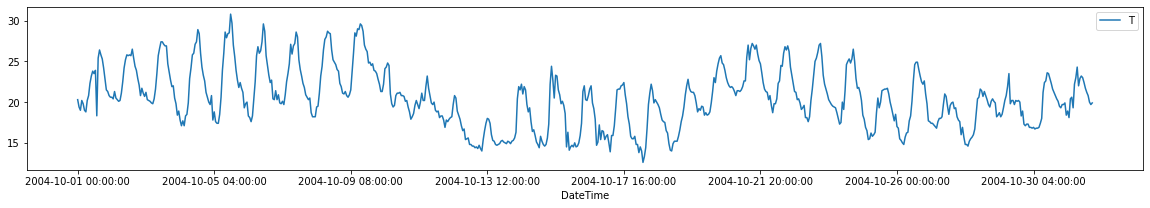

In [ ]:
dataframe[['T']].plot(figsize=(20,3))

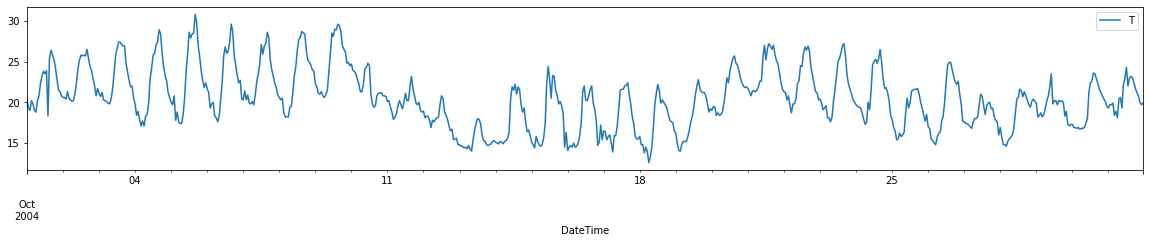

In [ ]:
dataframe[['T']].asfreq(freq = '60min').plot(figsize=(20,3))


ok. opto per il secondo grafico ma meglio parlarne tutti assieme, vediamo di mettere insieme tutto:

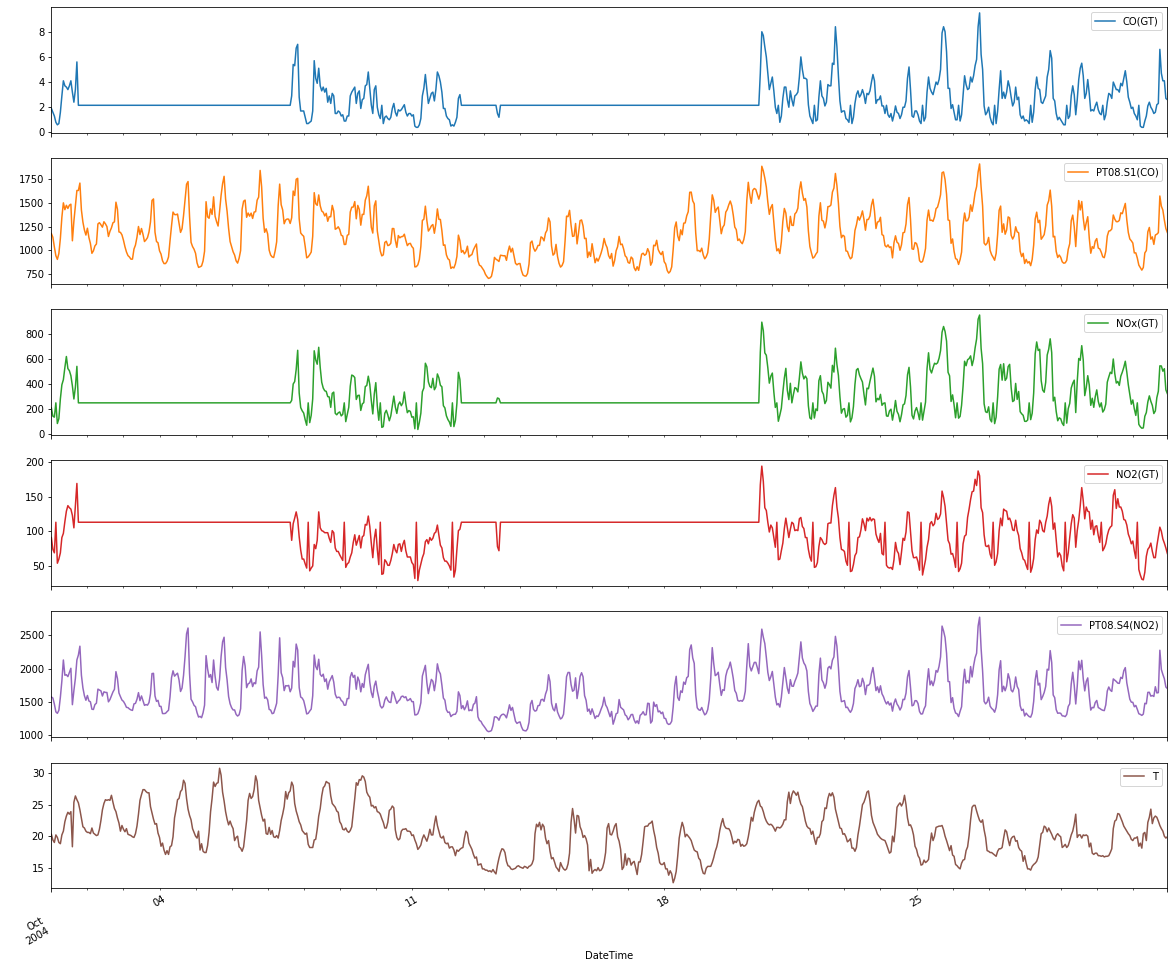

In [ ]:
dataframe[['CO(GT)','PT08.S1(CO)','NOx(GT)','NO2(GT)','PT08.S4(NO2)','T']].asfreq(freq = '60min').plot(subplots=True, figsize=(20,18))
plt.show()

Ora per ogni variabile voglio evidenziare i giorni in cui è weekend, quindi tecnicamente dovrebbe prendermi i sabati e le domeniche e evidenziare i valori di quei giorni di colore diverso, eppure mi segna cosi:

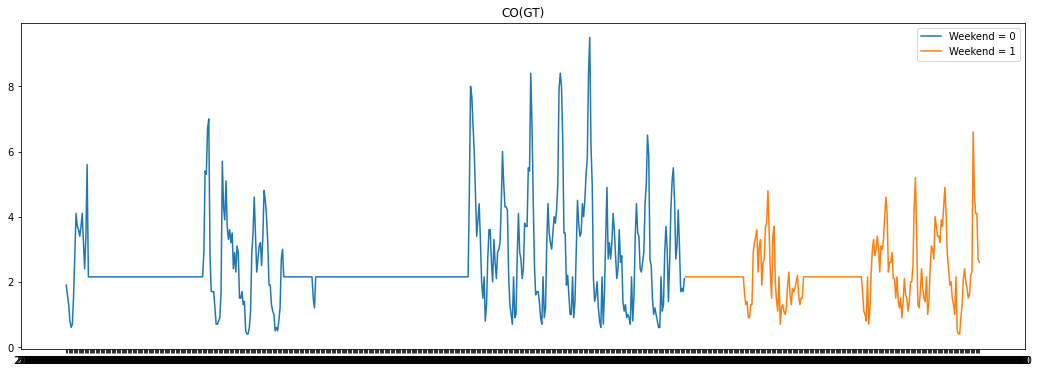

In [ ]:
noWeekend = dataframe[dataframe['Weekend']==0]
Weekend = dataframe[dataframe['Weekend']==1]

plt.figure(figsize=(18,6))

plt.title('CO(GT)')
plt.plot(noWeekend.index, noWeekend['CO(GT)'], label='Weekend = 0')
plt.plot(Weekend.index, Weekend['CO(GT)'], label='Weekend = 1')

plt.legend(loc='upper right')

VEDI SE RIESCI AD AGGIUSTARLO E FARLO ANCHE PER ALTRE VARIAIBLI, MI PIACEVA, NON CAPISCO PERCHè NON FUNZIONA

### **Matrix Profile 4 MOTIF & DISCORD**

Matrix Profile (MP) is a data structure that annotates a time series

**Identifying anomalous events / anomalie (or “discords”) and repeated patterns (“motifs”) are two fundamental time series tasks.**

We are going to continue our exploration with the "matrix profile" in order to discover any patterns or motif or anomalies in the series.

Qua mi spiega come approcciarsi e m indica gli algoritmi possibili

https://towardsdatascience.com/introduction-to-matrix-profiles-5568f3375d90

scegliamo algoritmo STOMP perchè indicato come il "migliore" in termini di velocità di esecuzione

The Matrix Profile has two primary components; a **distance profile** and **profile index**. 

The distance profile is a vector of minimum Z-Normalized Euclidean Distances. The profile index contains the index of its first nearest-neighbor. In other words, it is the location of its most similar sub-sequence.

The algorithms that compute the Matrix Profile use a **sliding window approach**. With a window size of m, the algorithm:

1.  Computes the distances for the windowed sub-sequence against the entire time series
2.   Sets an exclusion zone to ignore trivial matches
3. Updates the distance profile with the minimal values
4. Sets the first nearest-neighbor index




The distance calculations outlined above occur n-m + 1 times; where n is th length of the time series and m is the window size.

Simply put, a **motif** is a repeated pattern in a time series and a **discord** is an anomaly. 

With the Matrix Profile computed, it is simple to find the top-K number of motifs or discords. 

So, The Matrix Profile stores the distances in Euclidean space meaning that **a distance close to 0 is most similar to another sub-sequence in the time series** and a distance far away from 0, say 100, is unlike any other sub-sequence. 

***In this sense we can consider the lowest distances as a signal to identify  the motifs and the largest distances to identifiy the discords.***

In [ ]:
pip install matrixprofile-ts


In [ ]:
from matrixprofile import *
from matrixprofile.discords import discords

**IMPO INFO SU COME IO HO APPROCCIATO PROBLEMA**:

We are going to do the MOTIF analysis and anomaly discovery for each features. 

For anomalies discovery we fixed the amount of anomlaies to 15 e un numero di zone / campione da escludere = 5

#### **CO(GT)**

##### **MOTIF CO(GT)**

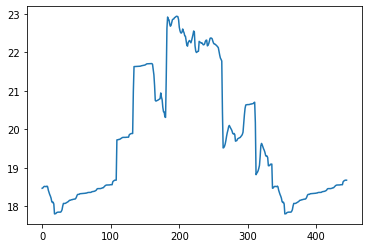

In [ ]:
w = 300  # dimensione finestra temporale (dovrebbe essere num osservazioni al giorno??)
mp_l, mpi_l = matrixProfile.stomp(dataframe['CO(GT)'].values, w)

plt.plot(mp_l)
plt.show()

Ora che ho andamento CO(GT) nella **w** segnata vado a vedere dove sono i motifs, non setto un numero massimo di motif, vediamo come va.

In [ ]:
mo_l, mod_l  = motifs.motifs(dataframe['CO(GT)'].values, (mp_l, mpi_l))
mo_l,mod_l

([[18, 169, 354]], [17.80520645129977])

In [ ]:
dataframe.index[mo_l[0]]

Index(['2004-10-01 18:00:00', '2004-10-08 01:00:00', '2004-10-15 18:00:00'], dtype='object', name='DateTime')

We can see that for CO(GT) variable we have 1 motif [18, 169, 354] with distance = 17.805 .
This motif it refers to the 1-10-2004 at 18:00 , to 08-10-2004 at 01:00 and to 15-10-2004 at 18:00

##### **DISCORD CO(GT)**

In [ ]:
anoms_l = discords(mp_l, ex_zone=5, k=15)
anoms_l, dataframe.index[anoms_l]

(array([196, 183, 190, 205, 221, 246, 240, 215, 229, 234, 251, 256, 261,
        160, 154]),
 Index(['2004-10-09 04:00:00', '2004-10-08 15:00:00', '2004-10-08 22:00:00',
        '2004-10-09 13:00:00', '2004-10-10 05:00:00', '2004-10-11 06:00:00',
        '2004-10-11 00:00:00', '2004-10-09 23:00:00', '2004-10-10 13:00:00',
        '2004-10-10 18:00:00', '2004-10-11 11:00:00', '2004-10-11 16:00:00',
        '2004-10-11 21:00:00', '2004-10-07 16:00:00', '2004-10-07 10:00:00'],
       dtype='object', name='DateTime'))

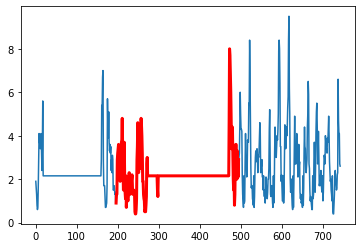

In [ ]:
plt.plot(dataframe['CO(GT)'].values)
colors = ['r'][:len(mo_l)]
for a, c in zip(anoms_l,colors):
    a_shape = dataframe['CO(GT)'].values[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)

plt.show()

15 Anomalies detected in the red zone of the graph, the period begin in 7-10-2004 at 10:00 an finish at 11-10-2004 at 21:00

#### **PT08.S1(CO)**

##### **MOTIF PT08.S1(CO)**

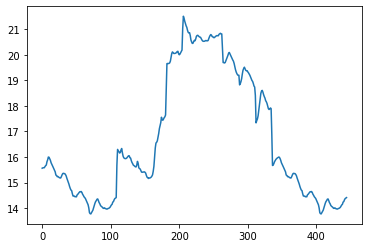

In [ ]:
w = 300  # dimensione finestra temporale (dovrebbe essere num osservazioni al giorno??)
mp_l, mpi_l = matrixProfile.stomp(dataframe['PT08.S1(CO)'].values, w)

plt.plot(mp_l)
plt.show()

Ora che ho andamento PT08.S1(CO) nella **w** segnata vado a vedere dove sono i motifs, non setto un numero massimo di motif, vediamo come va.

In [ ]:
mo_l, mod_l  = motifs.motifs(dataframe['PT08.S1(CO)'].values, (mp_l, mpi_l))
mo_l,mod_l

([[71, 239, 407]], [13.772199682580235])

In [ ]:
dataframe.index[mo_l[0]]

Index(['2004-10-03 23:00:00', '2004-10-10 23:00:00', '2004-10-17 23:00:00'], dtype='object', name='DateTime')

We can see that for PT08.S1(CO) variable we have 1 motif [71,239,407] with distance = 13.77 .
This motif it refers to the 3-10-2004 at 23:00 , to 10-10-2004 at 23:00 and to 17-10-2004 at 23:00

*Interessante questo perchè si ripete settimanalmente alla stessa ora*

##### **DISCORD PT08.S1(CO)**

In [ ]:
anoms_l = discords(mp_l, ex_zone=5, k=15)
anoms_l, dataframe.index[anoms_l]

(array([206, 211, 260, 246, 227, 216, 254, 232, 239, 221, 198, 190, 273,
        278, 267]),
 Index(['2004-10-09 14:00:00', '2004-10-09 19:00:00', '2004-10-11 20:00:00',
        '2004-10-11 06:00:00', '2004-10-10 11:00:00', '2004-10-10 00:00:00',
        '2004-10-11 14:00:00', '2004-10-10 16:00:00', '2004-10-10 23:00:00',
        '2004-10-10 05:00:00', '2004-10-09 06:00:00', '2004-10-08 22:00:00',
        '2004-10-12 09:00:00', '2004-10-12 14:00:00', '2004-10-12 03:00:00'],
       dtype='object', name='DateTime'))

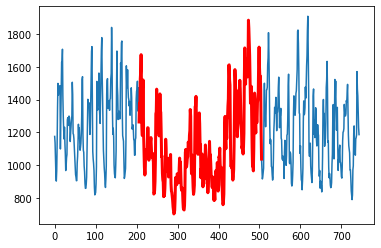

In [ ]:
plt.plot(dataframe['PT08.S1(CO)'].values)
colors = ['r'][:len(mo_l)]
for a, c in zip(anoms_l, colors):
    a_shape = dataframe['PT08.S1(CO)'].values[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)

plt.show()

15 Anomalies detected in the red zone of the graph, the period begin in 9-10-2004 at 06:00 an finish at 12-10-2004 at 14:00

#### **NOx(GT)**

##### **MOTIF NOx(GT)**

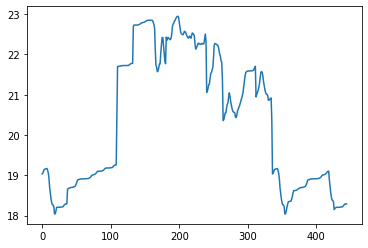

In [ ]:
w = 300  # dimensione finestra temporale (dovrebbe essere num osservazioni al giorno??)
mp_l, mpi_l = matrixProfile.stomp(dataframe['NOx(GT)'].values, w)

plt.plot(mp_l)
plt.show()

Ora che ho andamento NOx(GT) nella **w** segnata vado a vedere dove sono i motifs, non setto un numero massimo di motif, vediamo come va.

In [ ]:
mo_l, mod_l  = motifs.motifs(dataframe['NOx(GT)'].values, (mp_l, mpi_l))
mo_l,mod_l

([[18, 194, 354]], [18.043003719414912])

In [ ]:
dataframe.index[mo_l[0]]

Index(['2004-10-01 18:00:00', '2004-10-09 02:00:00', '2004-10-15 18:00:00'], dtype='object', name='DateTime')

We can see that for NOx(GT) variable we have 1 motif [18,194,354] with distance = 18.04 .
This motif it refers to the 1-10-2004 at 18:00 , to 9-10-2004 at 02:00 and to 15-10-2004 at 18:00

##### **DISCORD NOx(GT)**

In [ ]:
anoms_l = discords(mp_l, ex_zone=5, k=15)
anoms_l, dataframe.index[anoms_l]

(array([198, 157, 151, 162, 145, 192, 134, 139, 208, 219, 238, 181, 175,
        213, 186]),
 Index(['2004-10-09 06:00:00', '2004-10-07 13:00:00', '2004-10-07 07:00:00',
        '2004-10-07 18:00:00', '2004-10-07 01:00:00', '2004-10-09 00:00:00',
        '2004-10-06 14:00:00', '2004-10-06 19:00:00', '2004-10-09 16:00:00',
        '2004-10-10 03:00:00', '2004-10-10 22:00:00', '2004-10-08 13:00:00',
        '2004-10-08 07:00:00', '2004-10-09 21:00:00', '2004-10-08 18:00:00'],
       dtype='object', name='DateTime'))

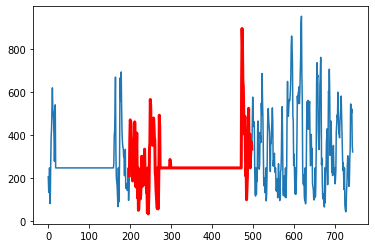

In [ ]:
plt.plot(dataframe['NOx(GT)'].values)
colors = ['r'][:len(mo_l)]
for a, c in zip(anoms_l, colors):
    a_shape = dataframe['NOx(GT)'].values[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)

plt.show()

15 Anomalies detected in the red zone of the graph, the period begin in 6-10-2004 at 14:00 an finish at 10-10-2004 at 22:00

#### **NO2(GT)**

##### **MOTIF NO2(GT)**

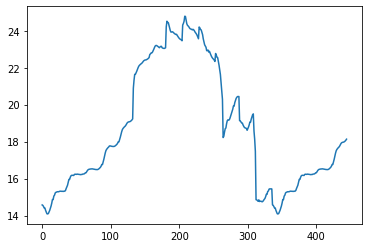

In [ ]:
w = 300  # dimensione finestra temporale (dovrebbe essere num osservazioni al giorno??)
mp_l, mpi_l = matrixProfile.stomp(dataframe['NO2(GT)'].values, w)

plt.plot(mp_l)
plt.show()

Ora che ho andamento NO2(GT) nella **w** segnata vado a vedere dove sono i motifs, non setto un numero massimo di motif, vediamo come va.

In [ ]:
mo_l, mod_l  = motifs.motifs(dataframe['NO2(GT)'].values, (mp_l, mpi_l))
mo_l,mod_l

([[8, 176, 344]], [14.092930930345707])

In [ ]:
dataframe.index[mo_l[0]]

Index(['2004-10-01 08:00:00', '2004-10-08 08:00:00', '2004-10-15 08:00:00'], dtype='object', name='DateTime')

We can see that for NO2(GT) variable we have 1 motif [8,176,344] with distance = 14.09 .
This motif it refers to the 1-10-2004 at 08:00 , to 8-10-2004 at 08:00 and to 15-10-2004 at 08:00

*Interessante anche questo che si ripete settimanalmente alle 08:00*

##### **DISCORD NO2(GT)** 

In [ ]:
anoms_l = discords(mp_l, ex_zone=5, k=15)
anoms_l, dataframe.index[anoms_l]

(array([208, 182, 213, 229, 220, 187, 192, 234, 197, 202, 166, 174, 239,
        244, 160]),
 Index(['2004-10-09 16:00:00', '2004-10-08 14:00:00', '2004-10-09 21:00:00',
        '2004-10-10 13:00:00', '2004-10-10 04:00:00', '2004-10-08 19:00:00',
        '2004-10-09 00:00:00', '2004-10-10 18:00:00', '2004-10-09 05:00:00',
        '2004-10-09 10:00:00', '2004-10-07 22:00:00', '2004-10-08 06:00:00',
        '2004-10-10 23:00:00', '2004-10-11 04:00:00', '2004-10-07 16:00:00'],
       dtype='object', name='DateTime'))

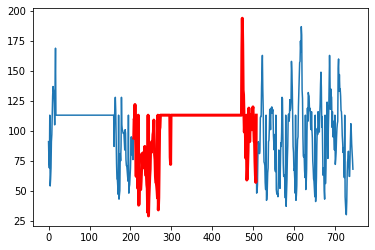

In [ ]:
plt.plot(dataframe['NO2(GT)'].values)
colors = ['r'][:len(mo_l)]
for a, c in zip(anoms_l, colors):
    a_shape = dataframe['NO2(GT)'].values[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)

plt.show()

15 Anomalies detected in the red zone of the graph, the period begin in 7-10-2004 at 16:00 an finish at 10-10-2004 at 23:00

#### **PT08.S4(NO2)**

##### **MOTIF PT08.S4(NO2)**

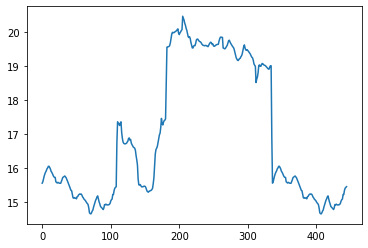

In [ ]:
w = 300  # dimensione finestra temporale (dovrebbe essere num osservazioni al giorno??)
mp_l, mpi_l = matrixProfile.stomp(dataframe['PT08.S4(NO2)'].values, w)

plt.plot(mp_l)
plt.show()

Ora che ho andamento PT08.S4(NO2) nella **w** segnata vado a vedere dove sono i motifs, non setto un numero massimo di motif, vediamo come va.

In [ ]:
mo_l, mod_l  = motifs.motifs(dataframe['PT08.S4(NO2)'].values, (mp_l, mpi_l))
mo_l,mod_l

([[71, 239, 407]], [14.66318580747557])

In [ ]:
dataframe.index[mo_l[0]]

Index(['2004-10-03 23:00:00', '2004-10-10 23:00:00', '2004-10-17 23:00:00'], dtype='object', name='DateTime')

We can see that for PT08.S4(NO2) variable we have 1 motif [71,239,407] with distance = 14.66 .
This motif it refers to the 3-10-2004 at 23:00 , to 10-10-2004 at 23:00 and to 17-10-2004 at 23:00

*Intererssante anche questo che si ripete settimaanlemnte alle 23:00*

##### **DISCORD PT08.S4(NO2)**

In [ ]:
anoms_l = discords(mp_l, ex_zone=5, k=15)
anoms_l, dataframe.index[anoms_l]

(array([205, 210, 198, 190, 215, 261, 227, 273, 246, 232, 255, 295, 239,
        221, 184]),
 Index(['2004-10-09 13:00:00', '2004-10-09 18:00:00', '2004-10-09 06:00:00',
        '2004-10-08 22:00:00', '2004-10-09 23:00:00', '2004-10-11 21:00:00',
        '2004-10-10 11:00:00', '2004-10-12 09:00:00', '2004-10-11 06:00:00',
        '2004-10-10 16:00:00', '2004-10-11 15:00:00', '2004-10-13 07:00:00',
        '2004-10-10 23:00:00', '2004-10-10 05:00:00', '2004-10-08 16:00:00'],
       dtype='object', name='DateTime'))

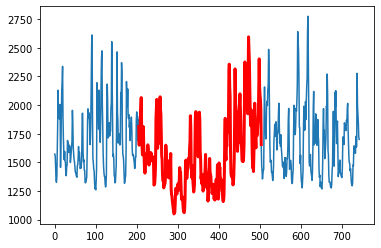

In [ ]:
plt.plot(dataframe['PT08.S4(NO2)'].values)
colors = ['r'][:len(mo_l)]
for a, c in zip(anoms_l, colors):
    a_shape = dataframe['PT08.S4(NO2)'].values[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)

plt.show()

15 Anomalies detected in the red zone of the graph, the period begin in 8-10-2004 at 16:00 an finish at 13-10-2004 at 07:00

#### **T**

##### **MOTIF T**

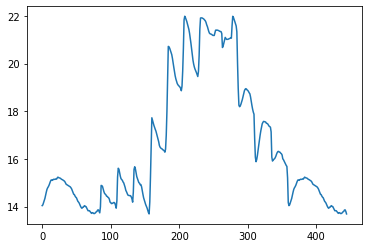

In [ ]:
w = 300  # dimensione finestra temporale (dovrebbe essere num osservazioni al giorno??)
mp_l, mpi_l = matrixProfile.stomp(dataframe['T'].values, w)

plt.plot(mp_l)
plt.show()

Ora che ho andamento T nella **w** segnata vado a vedere dove sono i motifs, non setto un numero massimo di motif, vediamo come va.

In [ ]:
mo_l, mod_l  = motifs.motifs(dataframe['T'].values, (mp_l, mpi_l))
mo_l,mod_l

([[5, 156, 444]], [13.6939623868872])

In [ ]:
dataframe.index[mo_l[0]]

Index(['2004-10-01 05:00:00', '2004-10-07 12:00:00', '2004-10-19 12:00:00'], dtype='object', name='DateTime')

We can see that for T variable we have 1 motif [5,156,444] with distance = 13.69 .
This motif it refers to the 1-10-2004 at 05:00 , to 07-10-2004 at 12:00 and to 19-10-2004 at 12:00

##### **DISCOVERY T**

In [ ]:
anoms_l = discords(mp_l, ex_zone=5, k=15)
anoms_l, dataframe.index[anoms_l]

(array([208, 278, 233, 238, 283, 213, 254, 259, 243, 248, 267, 272, 184,
        218, 189]),
 Index(['2004-10-09 16:00:00', '2004-10-12 14:00:00', '2004-10-10 17:00:00',
        '2004-10-10 22:00:00', '2004-10-12 19:00:00', '2004-10-09 21:00:00',
        '2004-10-11 14:00:00', '2004-10-11 19:00:00', '2004-10-11 03:00:00',
        '2004-10-11 08:00:00', '2004-10-12 03:00:00', '2004-10-12 08:00:00',
        '2004-10-08 16:00:00', '2004-10-10 02:00:00', '2004-10-08 21:00:00'],
       dtype='object', name='DateTime'))

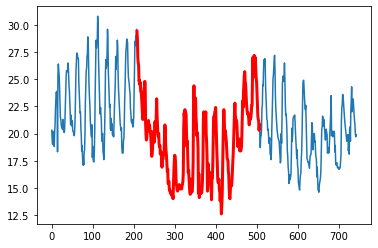

In [ ]:
plt.plot(dataframe['T'].values)
colors = ['r'][:len(mo_l)]
for a, c in zip(anoms_l, colors):
    a_shape = dataframe['T'].values[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)

plt.show()

15 Anomalies detected in the red zone of the graph, the period begin in 8-10-2004 at 16:00 an finish at 12-10-2004 at 19:00